# **getINNOtized-BI-Solution**

## **Business Understanding**

Overview: Thi is an end-to-end business intelligence solution for getINNOtized, analyzing 2019 sales data to provide insights that help the business find opportunities to drive more sales and work more efficiently.

Questions sort to be answered: 

1. How much money did we make this year? 

2. Can we identify any seasonality in the sales? 

3. What are our best and worst-selling products? 

4. How do sales compare to previous months or weeks? 

5. Which cities are our products delivered to most? 

6. How do product categories compare in revenue generated and quantities ordered? 

7. You are required to show additional details from your findings in your data. 

NB: Products with unit prices above $99.99 should be labeled high-level products otherwise they should be basic level. 

**HYPOTHESIS TESTING**

Null Hypothesis (H₀): There is no significant difference in the total sales (revenue) between high-level products priced above 99.99 and low-level products priced below 99.99

Alternative Hypothesis (H₁): High-level products priced above 99.99 and low-level products priced below 99.99

## **Data Understanding**

In [1]:
import pyodbc #just installed with pip
from dotenv import dotenv_values 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import re
from datetime import datetime


from scipy import stats
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm




import warnings
warnings.filterwarnings('ignore')


In [2]:
#Loading data for January to June 2019  from OneDrive downloaded data

Jan_2019= pd.read_csv('data\Sales_January_2019.csv')
Feb_2019= pd.read_csv('data\Sales_February_2019.csv')
Mar_2019= pd.read_csv('data\Sales_March_2019.csv')
Apr_2019= pd.read_csv('data\Sales_April_2019.csv')
May_2019= pd.read_csv('data\Sales_May_2019.csv')
Jun_2019= pd.read_csv('data\Sales_June_2019.csv')


In [3]:
Jan_2019.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [4]:
Feb_2019.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,150502,iPhone,1,700,02/18/19 01:35,"866 Spruce St, Portland, ME 04101"
1,150503,AA Batteries (4-pack),1,3.84,02/13/19 07:24,"18 13th St, San Francisco, CA 94016"
2,150504,27in 4K Gaming Monitor,1,389.99,02/18/19 09:46,"52 6th St, New York City, NY 10001"
3,150505,Lightning Charging Cable,1,14.95,02/02/19 16:47,"129 Cherry St, Atlanta, GA 30301"
4,150506,AA Batteries (4-pack),2,3.84,02/28/19 20:32,"548 Lincoln St, Seattle, WA 98101"


In [5]:
Mar_2019.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301"
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301"
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301"
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016"
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016"


In [6]:
Apr_2019.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [7]:
May_2019.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001"
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001"
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001"
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001"
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101"


In [8]:
Jun_2019.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101"
1,209922,Macbook Pro Laptop,1,1700.0,06/30/19 10:05,"80 4th St, San Francisco, CA 94016"
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001"
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101"
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016"


In [9]:
#Load environment variables from .env file into a dictionary to load data 2 which is July to December 2019

environment_variables=dotenv_values('.env')

# Get the values for the credentials you set in the '.env' file
database = environment_variables.get("database")
server = environment_variables.get("server")
username = environment_variables.get("username")
password = environment_variables.get("password")

connection_string=f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

In [10]:
# Use the connect method of the pyodbc library and pass in the connection string

connection=pyodbc.connect(connection_string)

In [11]:
db_query='''SELECT * 
FROM INFORMATION_SCHEMA.TABLES
WHERE TABLE_SCHEMA= 'dbo' '''

In [12]:
#July to December 2019 data

data_2= pd.read_sql(db_query, connection)
data_2

,TABLE_CATALOG,TABLE_SCHEMA,TABLE_NAME,TABLE_TYPE
0,dapDB,dbo,Sales_July_2019,BASE TABLE
1,dapDB,dbo,Sales_August_2019,BASE TABLE
2,dapDB,dbo,Sales_September_2019,BASE TABLE
3,dapDB,dbo,Sales_October_2019,BASE TABLE
4,dapDB,dbo,Sales_November_2019,BASE TABLE
5,dapDB,dbo,Sales_December_2019,BASE TABLE


In [13]:
#Loading July_2019

query = "SELECT * FROM dbo.Sales_July_2019"
Jul_2019 = pd.read_sql(query, connection)


#Loading Aug_2019 

query = "SELECT * FROM dbo.Sales_August_2019"
Aug_2019 = pd.read_sql(query, connection)


#Loading Sep_2019 

query = "SELECT * FROM dbo.Sales_September_2019"
Sep_2019 = pd.read_sql(query, connection)


#Loading Oct_2019 

query = "SELECT * FROM dbo.Sales_October_2019"
Oct_2019 = pd.read_sql(query, connection)


#Loading Nov_2019 

query = "SELECT * FROM dbo.Sales_November_2019"
Nov_2019 = pd.read_sql(query, connection)


#Loading Dec_2019 
query = "SELECT * FROM dbo.Sales_December_2019"

Dec_2019 = pd.read_sql(query, connection)

In [14]:
Jul_2019.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,222910.0,Apple Airpods Headphones,1.0,150.00,2026-07-19 16:51:00.0000000,"389 South St, Atlanta, GA 30301"
1,222911.0,Flatscreen TV,1.0,300.00,2005-07-19 08:55:00.0000000,"590 4th St, Seattle, WA 98101"
2,222912.0,AA Batteries (4-pack),1.0,3.84,2029-07-19 12:41:00.0000000,"861 Hill St, Atlanta, GA 30301"
3,222913.0,AA Batteries (4-pack),1.0,3.84,2028-07-19 10:15:00.0000000,"190 Ridge St, Atlanta, GA 30301"
4,222914.0,AAA Batteries (4-pack),5.0,2.99,2031-07-19 02:13:00.0000000,"824 Forest St, Seattle, WA 98101"


In [15]:
Aug_2019.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,236670.0,Wired Headphones,2.0,11.990000,2031-08-19 22:21:00.0000000,"359 Spruce St, Seattle, WA 98101"
1,236671.0,Bose SoundSport Headphones,1.0,99.989998,2015-08-19 15:11:00.0000000,"492 Ridge St, Dallas, TX 75001"
2,236672.0,iPhone,1.0,700.000000,2006-08-19 14:40:00.0000000,"149 7th St, Portland, OR 97035"
3,236673.0,AA Batteries (4-pack),2.0,3.840000,2029-08-19 20:59:00.0000000,"631 2nd St, Los Angeles, CA 90001"
4,236674.0,AA Batteries (4-pack),2.0,3.840000,2015-08-19 19:53:00.0000000,"736 14th St, New York City, NY 10001"


In [16]:
Sep_2019.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,248151.0,AA Batteries (4-pack),4.0,3.840000,2017-09-19 14:44:00.0000000,"380 North St, Los Angeles, CA 90001"
1,248152.0,USB-C Charging Cable,2.0,11.950000,2029-09-19 10:19:00.0000000,"511 8th St, Austin, TX 73301"
2,248153.0,USB-C Charging Cable,1.0,11.950000,2016-09-19 17:48:00.0000000,"151 Johnson St, Los Angeles, CA 90001"
3,248154.0,27in FHD Monitor,1.0,149.990005,2027-09-19 07:52:00.0000000,"355 Hickory St, Seattle, WA 98101"
4,248155.0,USB-C Charging Cable,1.0,11.950000,2001-09-19 19:03:00.0000000,"125 5th St, Atlanta, GA 30301"


In [17]:
Oct_2019.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,259358.0,34in Ultrawide Monitor,1.0,379.989990,2028-10-19 10:56:00.0000000,"609 Cherry St, Dallas, TX 75001"
1,259359.0,27in 4K Gaming Monitor,1.0,389.989990,2028-10-19 17:26:00.0000000,"225 5th St, Los Angeles, CA 90001"
2,259360.0,AAA Batteries (4-pack),2.0,2.990000,2024-10-19 17:20:00.0000000,"967 12th St, New York City, NY 10001"
3,259361.0,27in FHD Monitor,1.0,149.990005,2014-10-19 22:26:00.0000000,"628 Jefferson St, New York City, NY 10001"
4,259362.0,Wired Headphones,1.0,11.990000,2007-10-19 16:10:00.0000000,"534 14th St, Los Angeles, CA 90001"


In [18]:
Nov_2019.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,278797.0,Wired Headphones,1.0,11.990000,2021-11-19 09:54:00.0000000,"46 Park St, New York City, NY 10001"
1,278798.0,USB-C Charging Cable,2.0,11.950000,2017-11-19 10:03:00.0000000,"962 Hickory St, Austin, TX 73301"
2,278799.0,Apple Airpods Headphones,1.0,150.000000,2019-11-19 14:56:00.0000000,"464 Cherry St, Los Angeles, CA 90001"
3,278800.0,27in FHD Monitor,1.0,149.990005,2025-11-19 22:24:00.0000000,"649 10th St, Seattle, WA 98101"
4,278801.0,Bose SoundSport Headphones,1.0,99.989998,2009-11-19 13:56:00.0000000,"522 Hill St, Boston, MA 02215"


In [19]:
Dec_2019.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,295665.0,Macbook Pro Laptop,1.0,1700.000000,2030-12-19 00:01:00.0000000,"136 Church St, New York City, NY 10001"
1,295666.0,LG Washing Machine,1.0,600.000000,2029-12-19 07:03:00.0000000,"562 2nd St, New York City, NY 10001"
2,295667.0,USB-C Charging Cable,1.0,11.950000,2012-12-19 18:21:00.0000000,"277 Main St, New York City, NY 10001"
3,295668.0,27in FHD Monitor,1.0,149.990005,2022-12-19 15:13:00.0000000,"410 6th St, San Francisco, CA 94016"
4,295669.0,USB-C Charging Cable,1.0,11.950000,2018-12-19 12:38:00.0000000,"43 Hill St, Atlanta, GA 30301"


#### **Concatenate all the first half to second half 2019-Months**

In [20]:
# Rename the columns
Jan_2019.rename(columns={'Order ID': 'Order_ID', 'Product Name': 'Product', 'Quantity Ordered': 'Quantity_Ordered', 'Price Each': 'Price_Each', 'Order Date': 'Order_Date', 'Purchase Address': 'Purchase_Address'}, inplace=True)
Feb_2019.rename(columns={'Order ID': 'Order_ID', 'Product Name': 'Product', 'Quantity Ordered': 'Quantity_Ordered', 'Price Each': 'Price_Each', 'Order Date': 'Order_Date', 'Purchase Address': 'Purchase_Address'}, inplace=True)
Mar_2019.rename(columns={'Order ID': 'Order_ID', 'Product Name': 'Product', 'Quantity Ordered': 'Quantity_Ordered', 'Price Each': 'Price_Each', 'Order Date': 'Order_Date', 'Purchase Address': 'Purchase_Address'}, inplace=True)
Apr_2019.rename(columns={'Order ID': 'Order_ID', 'Product Name': 'Product', 'Quantity Ordered': 'Quantity_Ordered', 'Price Each': 'Price_Each', 'Order Date': 'Order_Date', 'Purchase Address': 'Purchase_Address'}, inplace=True)
May_2019.rename(columns={'Order ID': 'Order_ID', 'Product Name': 'Product', 'Quantity Ordered': 'Quantity_Ordered', 'Price Each': 'Price_Each', 'Order Date': 'Order_Date', 'Purchase Address': 'Purchase_Address'}, inplace=True)
Jun_2019.rename(columns={'Order ID': 'Order_ID', 'Product Name': 'Product', 'Quantity Ordered': 'Quantity_Ordered', 'Price Each': 'Price_Each', 'Order Date': 'Order_Date', 'Purchase Address': 'Purchase_Address'}, inplace=True)

In [21]:
# Combine all datasets by column names
Sales_2019= pd.concat([Jan_2019, Feb_2019, Mar_2019, Apr_2019, May_2019, Jun_2019, Jul_2019, Aug_2019, Sep_2019, Oct_2019, Nov_2019, Dec_2019])
Sales_2019.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


### **Expolatory Data Analysis**

**EDA Methods**

In [22]:
Sales_2019.shape

(186850, 6)

In [23]:
Sales_2019.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186850 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order_ID          186110 non-null  object
 1   Product           186305 non-null  object
 2   Quantity_Ordered  186110 non-null  object
 3   Price_Each        186110 non-null  object
 4   Order_Date        186110 non-null  object
 5   Purchase_Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [24]:
Sales_2019.nunique()

Order_ID            178438
Product                 20
Quantity_Ordered        18
Price_Each              40
Order_Date          142396
Purchase_Address    140788
dtype: int64

In [25]:
# Summary Statistics for Sales_2019

Sales_2019.describe().T

,count,unique,top,freq
Order_ID,186110,178438,Order ID,160
Product,186305,20,USB-C Charging Cable,21903
Quantity_Ordered,186110.0,18.0,1.0,91347.0
Price_Each,186110.0,40.0,11.95,11951.0
Order_Date,186110,142396,Order Date,160
Purchase_Address,186305,140788,Purchase Address,355


In [26]:
Sales_2019.duplicated().sum()

np.int64(1161)

In [27]:

Sales_2019.isnull().sum()

Order_ID            740
Product             545
Quantity_Ordered    740
Price_Each          740
Order_Date          740
Purchase_Address    545
dtype: int64

Observations

The output shows that the Sales_2019 dataset is a pandas DataFrame with 186,850 entries and 6 columns. The columns in the dataset are Order_ID, Product, Quantity_Ordered, Price_Each, Order_Date and Purchase_Address. The data types of all columns are object, indicating that the values in these columns are strings.

The dataset has a total of 86,850 entries and 186,110 non-null entries).

This shows the number of unique values in each column. This information can be useful for understanding the diversity of values in each column and identifying any potential patterns or trends.:

- Order_ID: There are 178,438 unique values.
- Product: There are 20 unique values.
- Quantity_Ordered: There are 18 unique values.
- Price_Each: There are 40 unique values.
- Order_Date: There are 14,239 unique values.
- Purchase_Address: There are 14,078 unique values.

## **Data Preparation**

 Handling duplicates 

In [28]:
# Call only duplicated values
duplicates = Sales_2019[Sales_2019.duplicated(keep=False)]

# Print the duplicated rows
duplicates.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
664,NaN,NaN,NaN,NaN,NaN,NaN
678,NaN,NaN,NaN,NaN,NaN,NaN
797,NaN,NaN,NaN,NaN,NaN,NaN
874,142071,AA Batteries (4-pack),1,3.84,01/17/19 23:02,"131 2nd St, Boston, MA 02215"
875,142071,AA Batteries (4-pack),1,3.84,01/17/19 23:02,"131 2nd St, Boston, MA 02215"


In [29]:
# Drop duplicate rows, keeping the first occurrence
Sales_2019_cleaned=Sales_2019.drop_duplicates()

In [30]:
Sales_2019_cleaned.duplicated().sum()

np.int64(0)

Handling Null values 

In [31]:
Sales_2019_cleaned.isnull().sum()

Order_ID            2
Product             1
Quantity_Ordered    2
Price_Each          2
Order_Date          2
Purchase_Address    1
dtype: int64

In [32]:
null_ID = Sales_2019_cleaned[Sales_2019_cleaned['Order_ID'].isnull()]

# Print the rows with null values in the 'Product' column
null_ID

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
664,NaN,NaN,NaN,NaN,NaN,NaN
775,NaN,Product,NaN,NaN,None,Purchase Address


In [33]:
null_product = Sales_2019_cleaned[Sales_2019_cleaned['Product'].isnull()]

# Print the rows with null values in the 'Product' column
null_product

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
664,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
null_Quantity = Sales_2019_cleaned[Sales_2019_cleaned['Quantity_Ordered'].isnull()]

# Print the rows with null values in the 'Product' column
null_Quantity

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
664,NaN,NaN,NaN,NaN,NaN,NaN
775,NaN,Product,NaN,NaN,None,Purchase Address


In [35]:
null_Price = Sales_2019_cleaned[Sales_2019_cleaned['Price_Each'].isnull()]

# Print the rows with null values in the 'Product' column
null_Price

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
664,NaN,NaN,NaN,NaN,NaN,NaN
775,NaN,Product,NaN,NaN,None,Purchase Address


In [36]:
null_Order = Sales_2019_cleaned[Sales_2019_cleaned['Order_Date'].isnull()]

# Print the rows with null values in the 'Product' column
null_Order

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
664,NaN,NaN,NaN,NaN,NaN,NaN
775,NaN,Product,NaN,NaN,None,Purchase Address


In [37]:
null_Purchase = Sales_2019_cleaned[Sales_2019_cleaned['Purchase_Address'].isnull()]

# Print the rows with null values in the 'Product' column
null_Purchase

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
664,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
# Drop rows where all values are NaN
Sales_2019_cleaned.dropna(how='all', inplace=True)

# Drop rows where specific columns contain unwanted strings (e.g., 'Product', 'Purchase Address')
Sales_2019_cleaned = Sales_2019_cleaned[~Sales_2019_cleaned['Order_ID'].str.contains('Order_ID', na=False)]
Sales_2019_cleaned = Sales_2019_cleaned[~Sales_2019_cleaned['Product'].str.contains('Product', na=False)]
Sales_2019_cleaned = Sales_2019_cleaned[~Sales_2019_cleaned['Quantity_Ordered'].str.contains('Quantity_Ordered', na=False)]
Sales_2019_cleaned = Sales_2019_cleaned[~Sales_2019_cleaned['Price_Each'].str.contains('Price_Each', na=False)]
Sales_2019_cleaned = Sales_2019_cleaned[~Sales_2019_cleaned['Order_Date'].str.contains('Order_Date', na=False)]
Sales_2019_cleaned = Sales_2019_cleaned[~Sales_2019_cleaned['Purchase_Address'].str.contains('Purchase_Address', na=False)]

In [39]:
Sales_2019_cleaned.isnull().sum()

Order_ID            0
Product             0
Quantity_Ordered    0
Price_Each          0
Order_Date          0
Purchase_Address    0
dtype: int64

Handling Datatypes

In [40]:
Sales_2019_cleaned.dtypes

Order_ID            object
Product             object
Quantity_Ordered    object
Price_Each          object
Order_Date          object
Purchase_Address    object
dtype: object

In [41]:
# Ensure that both 'Quantity_Ordered' and 'Price_Each' are numeric, handling any errors
Sales_2019_cleaned['Quantity_Ordered'] = pd.to_numeric(Sales_2019_cleaned['Quantity_Ordered'], errors='coerce')
Sales_2019_cleaned['Price_Each'] = pd.to_numeric(Sales_2019_cleaned['Price_Each'], errors='coerce')

In [42]:
# Convert 'Price_Each' to dollars
Sales_2019_cleaned['Price_Each'] = Sales_2019_cleaned['Price_Each'].apply(lambda x: x * 1.00)

# Round 'Price_Each' to 2 decimal places
Sales_2019_cleaned['Price_Each'] = Sales_2019_cleaned['Price_Each'].round(2)

In [43]:
Sales_2019_cleaned.dtypes

Order_ID             object
Product              object
Quantity_Ordered    float64
Price_Each          float64
Order_Date           object
Purchase_Address     object
dtype: object

In [44]:
# Convert 'Order_Date' to datetime 
Sales_2019_cleaned['Order_Date'] = pd.to_datetime(Sales_2019_cleaned['Order_Date'], errors='coerce')

# Drop any rows with invalid dates (NaT values)
Sales_2019_cleaned = Sales_2019_cleaned.dropna(subset=['Order_Date'])

# Extract year, month, day, hour, and minute
Sales_2019_cleaned['Year'] = Sales_2019_cleaned['Order_Date'].dt.year
Sales_2019_cleaned['Month'] = Sales_2019_cleaned['Order_Date'].dt.month
Sales_2019_cleaned['Day'] = Sales_2019_cleaned['Order_Date'].dt.day
Sales_2019_cleaned['Hour'] = Sales_2019_cleaned['Order_Date'].dt.hour
Sales_2019_cleaned['Minute'] = Sales_2019_cleaned['Order_Date'].dt.minute

# Print the first few rows to verify the changes
Sales_2019_cleaned.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Year,Month,Day,Hour,Minute
0,141234,iPhone,1.0,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",2019,1,22,21,25
1,141235,Lightning Charging Cable,1.0,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",2019,1,28,14,15
2,141236,Wired Headphones,2.0,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",2019,1,17,13,33
3,141237,27in FHD Monitor,1.0,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",2019,1,5,20,33
4,141238,Wired Headphones,1.0,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",2019,1,25,11,59


Feature Engineering

In [45]:
# Convert the 'Purchase_Address' column to string
Sales_2019_cleaned['Purchase_Address'] = Sales_2019_cleaned['Purchase_Address'].astype(str)

# Extract the city from 'Purchase_Address'
Sales_2019_cleaned['City'] = Sales_2019_cleaned['Purchase_Address'].apply(lambda x: x.split(',')[1].strip() if ',' in x else None)

# Display the first few rows to check if the city was extracted correctly
print(Sales_2019_cleaned[['Purchase_Address', 'City']].head())

                        Purchase_Address           City
0        944 Walnut St, Boston, MA 02215         Boston
1       185 Maple St, Portland, OR 97035       Portland
2  538 Adams St, San Francisco, CA 94016  San Francisco
3     738 10th St, Los Angeles, CA 90001    Los Angeles
4          387 10th St, Austin, TX 73301         Austin


In [46]:
cities=Sales_2019_cleaned['City'].unique()  # Get all unique cities

# Display all cities
print("List of cities in Sales_2O19_cleaned:")
for city in cities:
    print(city)

List of cities in Sales_2O19_cleaned:
Boston
Portland
San Francisco
Los Angeles
Austin
Atlanta
Seattle
New York City
Dallas


In [47]:
# Create a new column 'Total_Sales' by multiplying 'Quantity_Ordered' and 'Price_Each'
Sales_2019_cleaned['Total_Sales'] = Sales_2019_cleaned['Quantity_Ordered'] * Sales_2019_cleaned['Price_Each']

In [48]:
# Display the DataFrame with the new 'Total_Sales' column
Sales_2019_cleaned.tail()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Year,Month,Day,Hour,Minute,City,Total_Sales
25112,319666.0,Lightning Charging Cable,1.0,14.95,2011-12-19 20:58:00,"14 Madison St, San Francisco, CA 94016",2011,12,19,20,58,San Francisco,14.95
25113,319667.0,AA Batteries (4-pack),2.0,3.84,2001-12-19 12:01:00,"549 Willow St, Los Angeles, CA 90001",2001,12,19,12,1,Los Angeles,7.68
25114,319668.0,Vareebadd Phone,1.0,400.00,2009-12-19 06:43:00,"273 Wilson St, Seattle, WA 98101",2009,12,19,6,43,Seattle,400.00
25115,319669.0,Wired Headphones,1.0,11.99,2003-12-19 10:39:00,"778 River St, Dallas, TX 75001",2003,12,19,10,39,Dallas,11.99
25116,319670.0,Bose SoundSport Headphones,1.0,99.99,2021-12-19 21:45:00,"747 Chestnut St, Los Angeles, CA 90001",2021,12,19,21,45,Los Angeles,99.99


In [49]:
# Create a new column 'Product_Level' based on the condition of 'Price_Each'
Sales_2019_cleaned['Product_Level'] = np.where(Sales_2019_cleaned['Price_Each'] > 99.99, 'High-Level', 'Basic-Level')

In [50]:
Sales_2019_cleaned

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Year,Month,Day,Hour,Minute,City,Total_Sales,Product_Level
0,141234,iPhone,1.0,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",2019,1,22,21,25,Boston,700.00,High-Level
1,141235,Lightning Charging Cable,1.0,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",2019,1,28,14,15,Portland,14.95,Basic-Level
2,141236,Wired Headphones,2.0,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",2019,1,17,13,33,San Francisco,23.98,Basic-Level
3,141237,27in FHD Monitor,1.0,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",2019,1,5,20,33,Los Angeles,149.99,High-Level
4,141238,Wired Headphones,1.0,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",2019,1,25,11,59,Austin,11.99,Basic-Level
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25112,319666.0,Lightning Charging Cable,1.0,14.95,2011-12-19 20:58:00,"14 Madison St, San Francisco, CA 94016",2011,12,19,20,58,San Francisco,14.95,Basic-Level
25113,319667.0,AA Batteries (4-pack),2.0,3.84,2001-12-19 12:01:00,"549 Willow St, Los Angeles, CA 90001",2001,12,19,12,1,Los Angeles,7.68,Basic-Level
25114,319668.0,Vareebadd Phone,1.0,400.00,2009-12-19 06:43:00,"273 Wilson St, Seattle, WA 98101",2009,12,19,6,43,Seattle,400.00,High-Level
25115,319669.0,Wired Headphones,1.0,11.99,2003-12-19 10:39:00,"778 River St, Dallas, TX 75001",2003,12,19,10,39,Dallas,11.99,Basic-Level


Checking if all the data is only 2019 data as needed and expected 

In [51]:
# Get the number of unique dates in the 'Order_Date' column
num_unique_dates = Sales_2019_cleaned["Order_Date"].nunique()

print(f"There are {num_unique_dates} unique order dates.")

There are 142395 unique order dates.


In [52]:
# Get the minimum and maximum date in the 'Order_Date' column
min_date = Sales_2019_cleaned["Order_Date"].min()
max_date = Sales_2019_cleaned["Order_Date"].max()

print(f"The date range is from {min_date} to {max_date}.")

The date range is from 2001-01-20 00:10:00 to 2031-12-19 23:53:00.


In [53]:
# Sum of rows where the Year is less than 2019
year_less_than_2019_count = (Sales_2019_cleaned["Year"] < 2019).sum()
 
# Print the result
print(f"Number of rows where the Year is less than 2019: {year_less_than_2019_count}")

# Calculate the percentage of such rows
percentage = (year_less_than_2019_count / len(Sales_2019_cleaned)) * 100

# Print the result
print(f"Percentage of records with year less than 2019: {percentage}%")

Number of rows where the Year is less than 2019: 58789
Percentage of records with year less than 2019: 31.660437512790406%


In [54]:
# Sum of rows where the Year is greater than 2019
year_greater_than_2019_count = (Sales_2019_cleaned["Year"] > 2019).sum()
 
# Print the result
print(f"Number of rows where the Year is greater than 2019: {year_greater_than_2019_count}")

# Calculate the percentage of such rows
percentage = (year_greater_than_2019_count / len(Sales_2019_cleaned)) * 100

# Print the result
print(f"Percentage of records with year greater than 2019: {percentage}%")

Number of rows where the Year is greater than 2019: 38419
Percentage of records with year greater than 2019: 20.690305138782676%


In [55]:
# Sum of rows where the Year equal to 2019
year_equal_to_2019_count = (Sales_2019_cleaned["Year"] ==2019).sum()
 
# Print the result
print(f"Number of rows where the Year is equal to 2019: {year_equal_to_2019_count}")

# Calculate the percentage of such rows
percentage = (year_equal_to_2019_count / len(Sales_2019_cleaned)) * 100

# Print the result
print(f"Percentage of records with year equal to 2019: {percentage}%")

Number of rows where the Year is equal to 2019: 88478
Percentage of records with year equal to 2019: 47.649257348426914%


In [56]:
# Sum all three counts
total_count = year_less_than_2019_count + year_greater_than_2019_count + year_equal_to_2019_count

# Print the result
print(f"total_count: {total_count}")

total_count: 185686


Retrieve only 2019 data

In [57]:
# Create a new DataFrame to store final cleaned data
Final_Sales_2019 =Sales_2019_cleaned.copy()

# Ensure the 'Order_Date' column is in datetime format
Final_Sales_2019['Order_Date'] = pd.to_datetime(Sales_2019_cleaned['Order_Date'], errors='coerce')

# Extract rows where the 'Order_Date' year is 2019
Final_Sales_2019 = Sales_2019_cleaned[Sales_2019_cleaned['Order_Date'].dt.year == 2019]

# Display the filtered data
Final_Sales_2019

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Year,Month,Day,Hour,Minute,City,Total_Sales,Product_Level
0,141234,iPhone,1.0,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",2019,1,22,21,25,Boston,700.00,High-Level
1,141235,Lightning Charging Cable,1.0,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",2019,1,28,14,15,Portland,14.95,Basic-Level
2,141236,Wired Headphones,2.0,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",2019,1,17,13,33,San Francisco,23.98,Basic-Level
3,141237,27in FHD Monitor,1.0,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",2019,1,5,20,33,Los Angeles,149.99,High-Level
4,141238,Wired Headphones,1.0,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",2019,1,25,11,59,Austin,11.99,Basic-Level
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24899,319460.0,Bose SoundSport Headphones,1.0,99.99,2019-12-19 19:31:00,"50 Lake St, Boston, MA 02215",2019,12,19,19,31,Boston,99.99,Basic-Level
24907,319468.0,Wired Headphones,1.0,11.99,2019-12-19 10:35:00,"245 Wilson St, Los Angeles, CA 90001",2019,12,19,10,35,Los Angeles,11.99,Basic-Level
25022,319579.0,Lightning Charging Cable,1.0,14.95,2019-12-19 19:28:00,"285 4th St, Los Angeles, CA 90001",2019,12,19,19,28,Los Angeles,14.95,Basic-Level
25064,319619.0,AAA Batteries (4-pack),1.0,2.99,2019-12-19 21:09:00,"908 2nd St, Los Angeles, CA 90001",2019,12,19,21,9,Los Angeles,2.99,Basic-Level


**Observations & Comments for the Data Preparation stage**

The dataset had alot of inconsistencies. Cleaning was done by:

Convert the Order_Date to datetime.

Extract the Minutes, Hour, Day, Month and Year from the Order_Date

Drop empty rows in each column.

Convert the Price_Each, Quantity_Ordered to numeric values.

Convert the Price_Each to Dollars and 2 decimal places.

Create a new column by for Total_Sales by multiplying the Price_Each vs the Quantity_Ordered.

Extract the Cities from the Purchase_Address

Create a new column for the Product level by categorizing the Price of the Product as High Level (greater than 
99.99) and Basic Level less that 99.99

Found out the data had sales from the year 2001 to 2031. Extracted only sales from 2019 to analyze as requested by the client.

In [58]:
Final_Sales_2019.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88478 entries, 0 to 25082
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order_ID          88478 non-null  object        
 1   Product           88478 non-null  object        
 2   Quantity_Ordered  88478 non-null  float64       
 3   Price_Each        88478 non-null  float64       
 4   Order_Date        88478 non-null  datetime64[ns]
 5   Purchase_Address  88478 non-null  object        
 6   Year              88478 non-null  int32         
 7   Month             88478 non-null  int32         
 8   Day               88478 non-null  int32         
 9   Hour              88478 non-null  int32         
 10  Minute            88478 non-null  int32         
 11  City              88478 non-null  object        
 12  Total_Sales       88478 non-null  float64       
 13  Product_Level     88478 non-null  object        
dtypes: datetime64[ns](1), float

####  **Hypothesis Testing**

In [59]:
# Test the hypothesis using ANOVA (Analysis of Variance)


# Step 2: Perform ANOVA
# Split the data into two groups based on 'Product_Level'
high_level_products = Final_Sales_2019[Final_Sales_2019['Product_Level'] == 'High-Level']['Total_Sales']
basic_level_products = Final_Sales_2019[Final_Sales_2019['Product_Level'] == 'Basic-Level']['Total_Sales']

# Perform ANOVA
f_value, p_value = stats.f_oneway(high_level_products, basic_level_products)

# Step 3: Interpret the results
alpha = 0.05  # Significance level

if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in revenue between high-level and basic-level products.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in revenue between high-level and basic-level products.")

Reject the null hypothesis. There is a significant difference in revenue between high-level and basic-level products.


**Comments**

The p-value is less than 0.05, it indicates that there is a significant difference in revenue between high-level and basic-level products.

Interpretation of the Outcome: The result indicates that there is a statistically significant difference in the total sales generated by high-level products compared to basic-level products.

Significance: This suggests that high-level products priced above 99.99 genrate more sale compared to low level products priced below 99.99.  The sales difference is not due to random chance but rather indicates a real effect.

**EDA VISUALS**

In [60]:
# Summary Statistics for numerical Columns

Final_Sales_2019.describe()

,Quantity_Ordered,Price_Each,Order_Date,Year,Month,Day,Hour,Minute,Total_Sales
count,88478.000000,88478.000000,88478,88478.0,88478.000000,88478.000000,88478.000000,88478.000000,88478.000000
mean,1.125048,185.523855,2019-04-15 01:32:17.644386048,2019.0,3.949276,15.732148,14.408474,29.552375,186.644234
min,1.000000,2.990000,2019-01-01 03:07:00,2019.0,1.000000,1.000000,0.000000,0.000000,2.990000
25%,1.000000,11.950000,2019-03-02 05:18:15,2019.0,3.000000,8.000000,11.000000,15.000000,11.950000
50%,1.000000,14.950000,2019-04-13 11:40:30,2019.0,4.000000,16.000000,15.000000,30.000000,14.950000
75%,1.000000,150.000000,2019-05-22 10:11:30,2019.0,5.000000,23.000000,19.000000,45.000000,150.000000
max,9.000000,1700.000000,2019-12-19 23:56:00,2019.0,12.000000,31.000000,23.000000,59.000000,3400.000000
std,0.439837,333.119010,NaN,0.0,1.982815,8.554970,5.419381,17.339158,333.581138


Univariate: Distribution of Total Sales

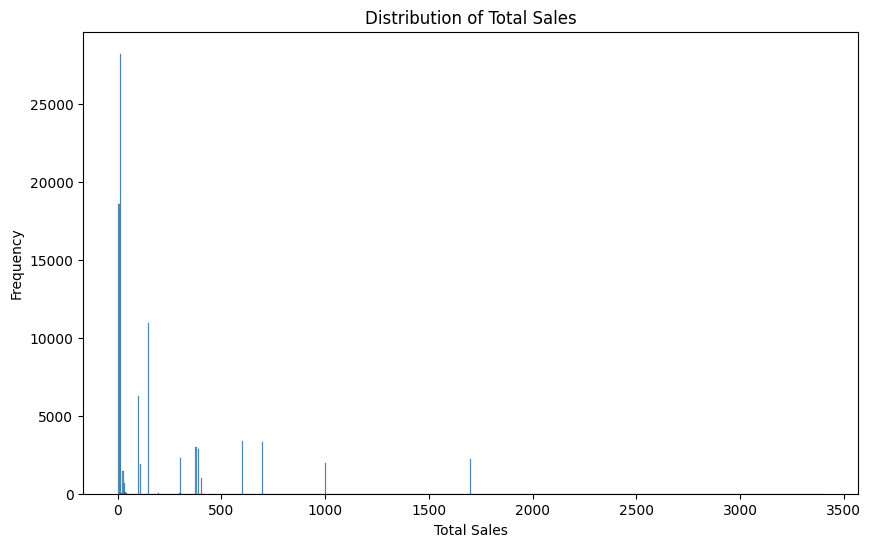

In [61]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot a histogram of the 'Total_Sales' column
sns.histplot(Final_Sales_2019['Total_Sales'], ax=ax)

# Set the title and labels
ax.set_title('Distribution of Total Sales')
ax.set_xlabel('Total Sales')
ax.set_ylabel('Frequency')

# Display the figure
plt.show()

The histogram plot above visualizes the distribution of total sales, showing the frequency of sales values. From the histogram, we can observe that the majority of sales fall within a certain range, with some outliers on the higher end.

The histogram plot helps us understand the central tendency (mean) and spread (standard deviation) of the total sales data. It also provides insights into the skewness and kurtosis of the distribution, which can help us identify any potential issues or patterns in the data.

In this case, the distribution of total sales appears to be right-skewed, indicating that the mean is greater than the median. This suggests that there are more sales with higher values than lower values. The presence of outliers on the higher end indicates that there are some sales with significantly higher revenue compared to the majority of sales.

Bivariate: Scatter plot of Total Sales vs Quantity Ordered

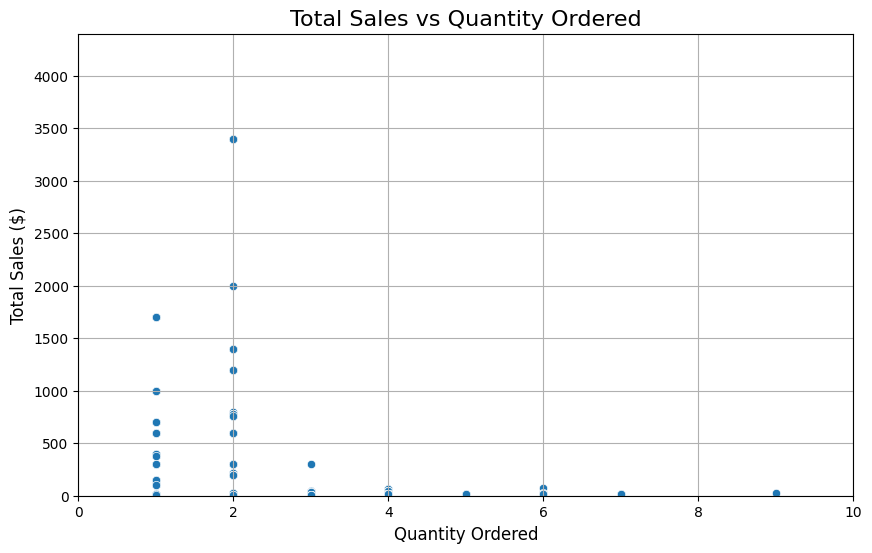

In [62]:
# Set plot size
plt.figure(figsize=(10, 6))

# Create a scatter plot of Total Sales vs Quantity Ordered
scatter_plot = sns.scatterplot(x='Quantity_Ordered', y='Total_Sales', data=Final_Sales_2019)

# Customize the layout
plt.title('Total Sales vs Quantity Ordered', fontsize=16)
plt.xlabel('Quantity Ordered', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)

# Optional: Add grid and adjust plot limits for better visibility
plt.grid(True)
plt.xlim(0, Final_Sales_2019['Quantity_Ordered'].max() + 1)  # Adjust x-axis to fit data better
plt.ylim(0, Final_Sales_2019['Total_Sales'].max() + 1000)  # Adjust y-axis for some padding

# Show the scatter plot
plt.show()


From the scatter plot, we can see that there is a positive correlation between the total sales and the quantity ordered. As the quantity ordered increases, the total sales tend to increase as well. This relationship suggests that the sales are directly proportional to the quantity ordered.

Correlation Matrix

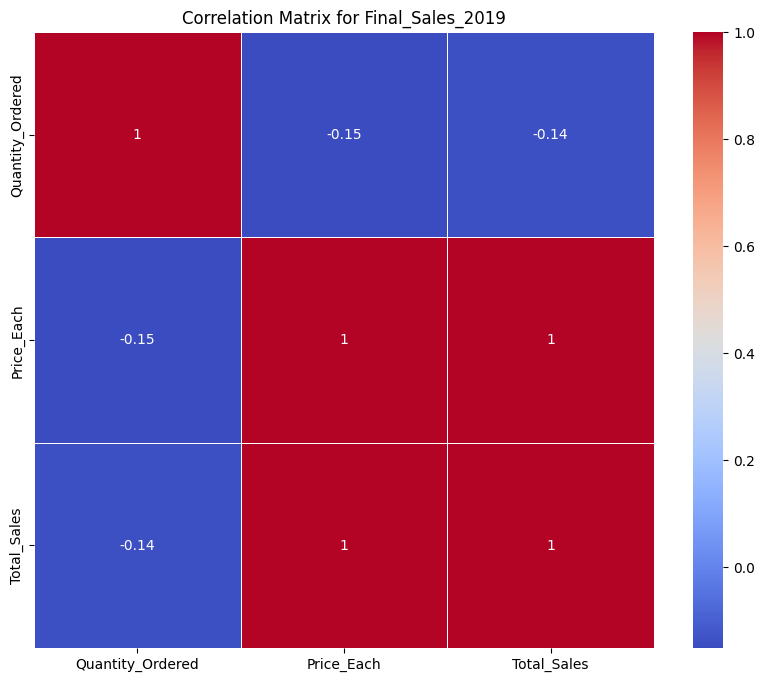

In [63]:
# Select only numeric columns from Final_Sales_2019
numeric_data = Final_Sales_2019.select_dtypes(include=['float64', 'int64'])


# Compute the correlation matrix for the numeric columns
correlation_matrix = numeric_data.corr()

# Set the figure size
plt.figure(figsize=(10, 8))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)


# Set plot title
plt.title('Correlation Matrix for Final_Sales_2019')

# Show the plot
plt.show()


Comments

The correlation matrix helps us understand the relationships between multiple variables in the dataset. In this case, the correlation matrix shows a strong positive correlation (0.97) between Total_Sales and Quantity_Ordered. This indicates that the two variables are highly correlated, and changes in one variable can be expected to result in corresponding changes in the other variable.

Total Sale by Product

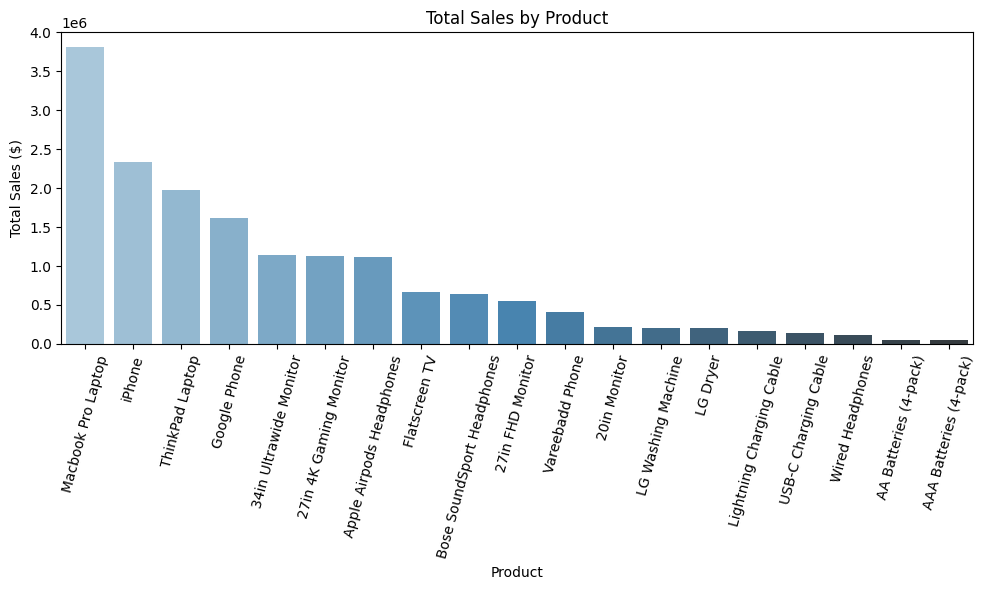

In [64]:
# Group by product and calculate total sales for each product
product_sales = Final_Sales_2019.groupby('Product')['Total_Sales'].sum().sort_values(ascending=False).reset_index()

# Create a Seaborn bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Product', y='Total_Sales', data=product_sales, palette='Blues_d')

# Update plot layout
plt.title('Total Sales by Product')
plt.xlabel('Product')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=75)  # Rotate x-axis labels

# Show the plot
plt.tight_layout()
plt.show()

Comments

The bar chart visualizes the total sales for each product, allowing us to compare the sales generated by different products. From the chart, we can identify which products have the highest and lowest sales. In this case, the product with the highest sales is Macbook Pro Laptop followed by Iphone, ThinkPad Laptop and AAA Batteries (4 Pack) has the lowest sales.

Product Level Distribution

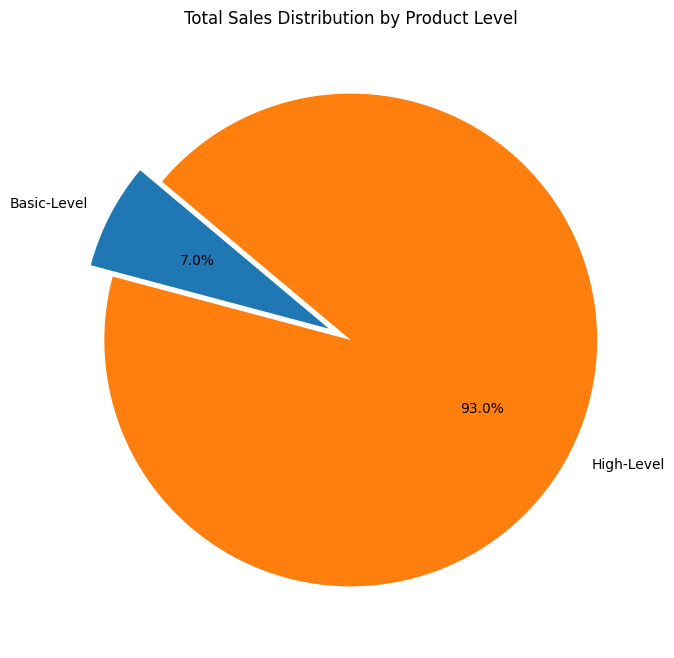

In [65]:
# Group by product level and calculate total sales
product_level_sales = Final_Sales_2019.groupby('Product_Level')['Total_Sales'].sum().reset_index()

# Create a pie chart
plt.figure(figsize=(8, 8))

# Plot pie chart
plt.pie(
    product_level_sales['Total_Sales'], 
    labels=product_level_sales['Product_Level'], 
    autopct='%1.1f%%', 
    startangle=140, 
    explode=(0.1, 0)  # Explode the first slice slightly
)

# Update layout
plt.title('Total Sales Distribution by Product Level')

# Show the plot
plt.show()

Comments

The pie chart represents the total sales distribution by product level (High-Level and Basic-Level). From the chart, majority of sales come from high-level products, with a smaller proportion coming from basic-level products. This distribution can help us understand the sales patterns and preferences of the customers.

Monthly Sales Trend

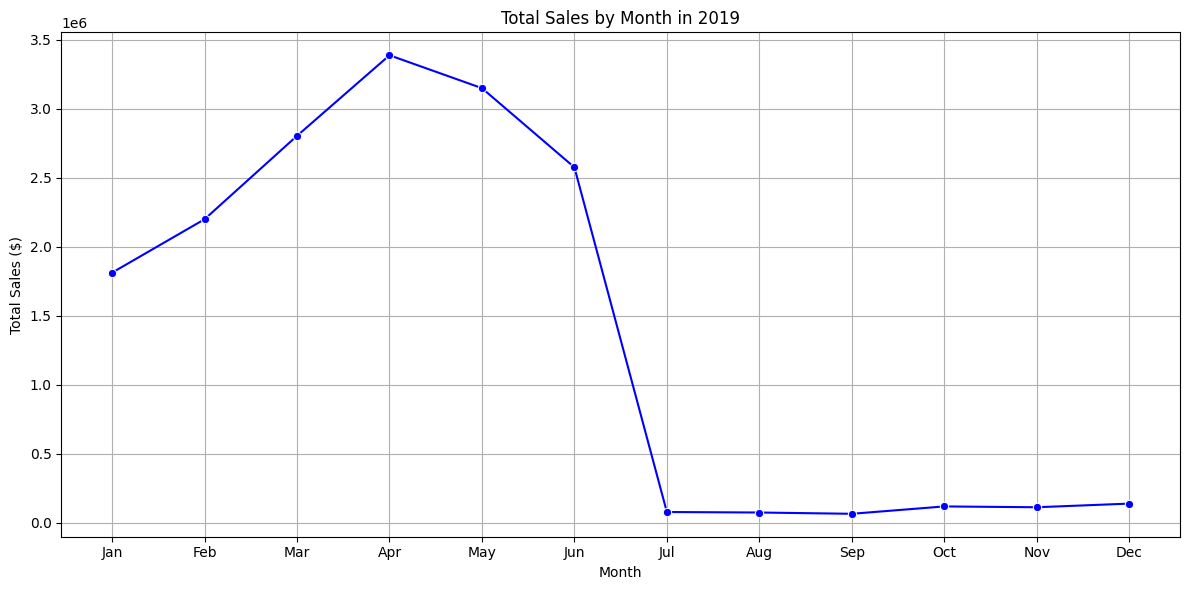

In [66]:
# Ensure that 'Order_Date' is in datetime format
Final_Sales_2019['Order_Date'] = pd.to_datetime(Final_Sales_2019['Order_Date'], errors='coerce')
Final_Sales_2019['Month'] = Final_Sales_2019['Order_Date'].dt.month

# Calculate monthly sales
monthly_sales = Final_Sales_2019.groupby('Month')['Total_Sales'].sum().reset_index()
monthly_sales.columns = ['Month', 'Total_Sales']

# Plot total sales by month using Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='Month', y='Total_Sales', marker='o', color='b')
plt.title('Total Sales by Month in 2019')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.tight_layout()
plt.show()

Comments

The line chart shows the total sales per month, providing insights into the sales trends over time. From the chart,we can identify any seasonal patterns, trends, or anomalies in the sales data. The sale started increasing from January to April and started declining from May to June. The sales rapidily declined in July to September and slightly increased October to December.

Weekly Sales Trend

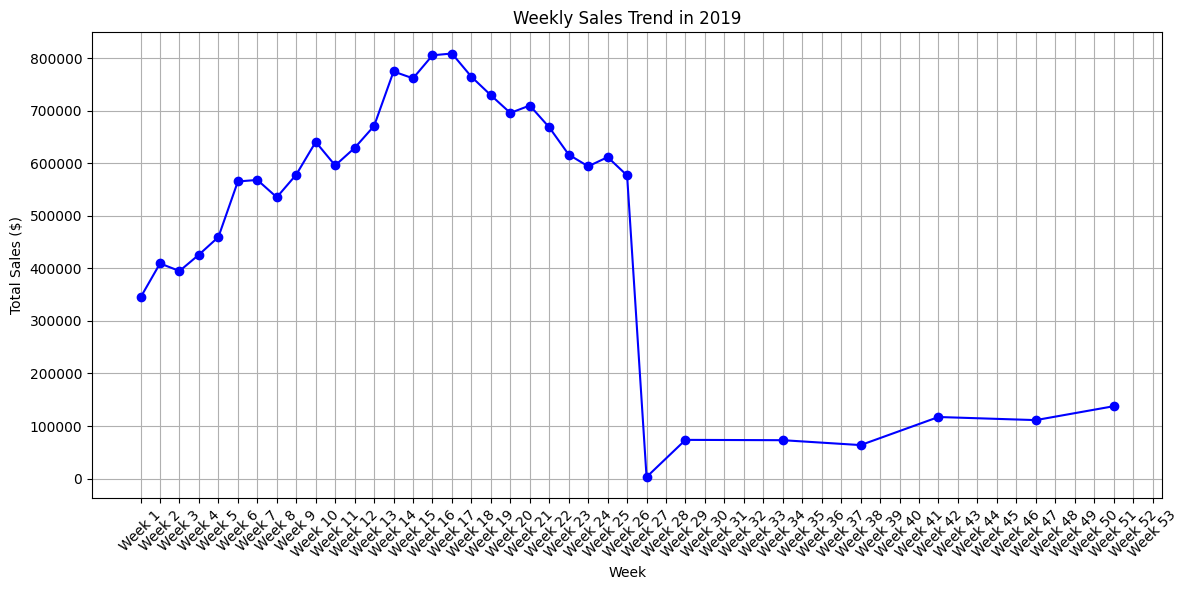

In [67]:
# Ensure that 'Order_Date' is in datetime format
Final_Sales_2019['Order_Date'] = pd.to_datetime(Final_Sales_2019['Order_Date'], errors='coerce')
Final_Sales_2019['Week'] = Final_Sales_2019['Order_Date'].dt.isocalendar().week

# Calculate weekly sales
weekly_sales = Final_Sales_2019.groupby('Week')['Total_Sales'].sum().reset_index()
weekly_sales.columns = ['Week', 'Total_Sales']

# Plot weekly sales trend using Matplotlib
plt.figure(figsize=(12, 6))
plt.plot(weekly_sales['Week'], weekly_sales['Total_Sales'], marker='o', linestyle='-', color='b')
plt.title('Weekly Sales Trend in 2019')
plt.xlabel('Week')
plt.ylabel('Total Sales ($)')
plt.xticks(ticks=range(1, 54), labels=[f'Week {i}' for i in range(1, 54)], rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Comments

In weekly sales trend, the sales increase from week one and gets to the peak at week 16 and 17. It starts declining at week 18 and dips at week 27. Then it start rising slowly at week 29.

Decompose the time series data

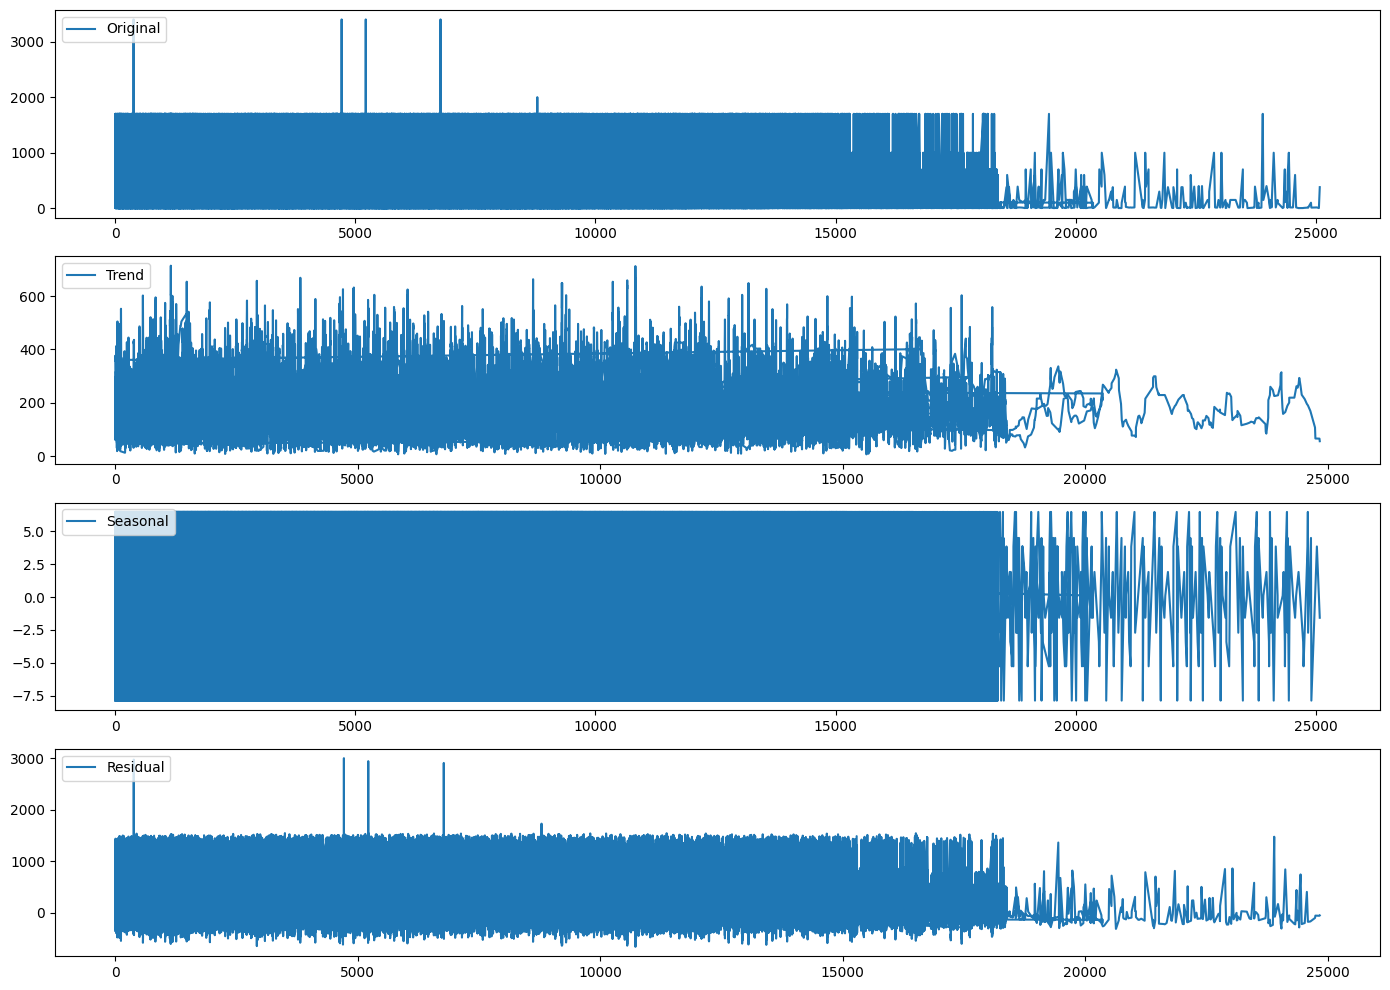

In [68]:
# Decompose the time series data
decomposition = seasonal_decompose(Final_Sales_2019['Total_Sales'], model='additive',period=12)

# Plot the decomposed components
plt.figure(figsize=(14, 10))
plt.subplot(4, 1, 1)
plt.plot(Final_Sales_2019.index, Final_Sales_2019['Total_Sales'], label='Original')
plt.legend(loc='upper left')
plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

Comments

Based on the visualization of the decomposition of the time series data for the Final_Sales_2019 dataset, we can gain the following insights:

1. The seasonal component plot shows a recurring pattern of increased sales during the holiday season (around December) and a decrease in sales during the summer months (June to August). This pattern suggests that the sales data may be influenced by seasonal factors, such as holiday promotions and weather conditions.

2. The trend component plot shows a general increasing trend over the 12-month period. This trend indicates that the total sales of the products are increasing over time. This could be due to factors such as market growth, increased demand, or changes in customer preferences.

3. The residual component plot shows small fluctuations around zero, indicating that the model has effectively captured the underlying patterns in the data. This suggests that the decomposition of the time series data provides a good representation of the data, capturing the trend, seasonal patterns, and random fluctuations.

These insights can help in understanding the sales patterns and trends can be useful for further analysis, forecasting, and decision-making.

Total Sales by City

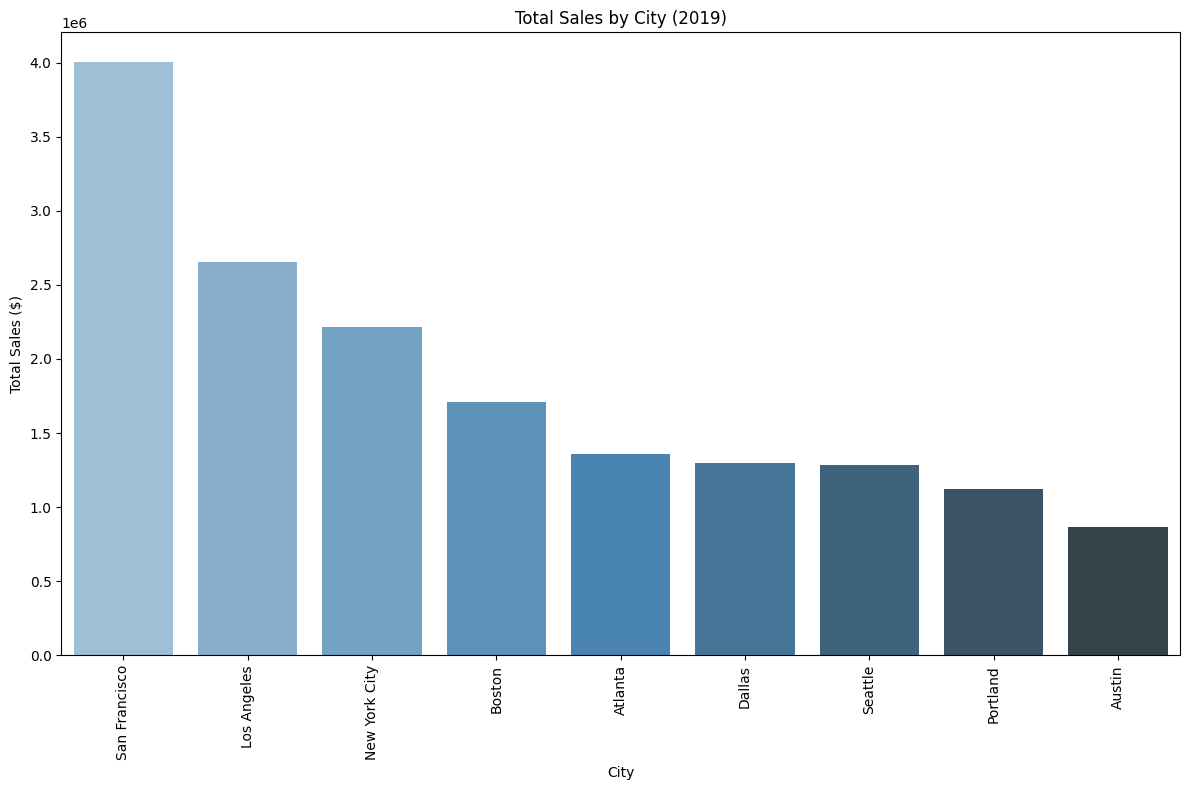

In [69]:
# Group by 'City' to calculate Total Sales per City
Sales_by_city = Final_Sales_2019.groupby('City')['Total_Sales'].sum().sort_values(ascending=False).reset_index()

# Set the figure size
plt.figure(figsize=(12, 8))

# Create a bar plot
sns.barplot(data=Sales_by_city, x='City', y='Total_Sales', palette='Blues_d')

# Customize the plot
plt.title('Total Sales by City (2019)')
plt.xlabel('City')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()

Comments

The bar chart visualizes the total sales by city, allowing us to compare the sales generated by cities. From the chart, we can identify which city have the highest and lowest sales. In this case, the city with the highest sales is San francisco followed by Los Angeles, New York City, Boston and Atlanta been the city with the lowest sales.

Sales from only San Francisco

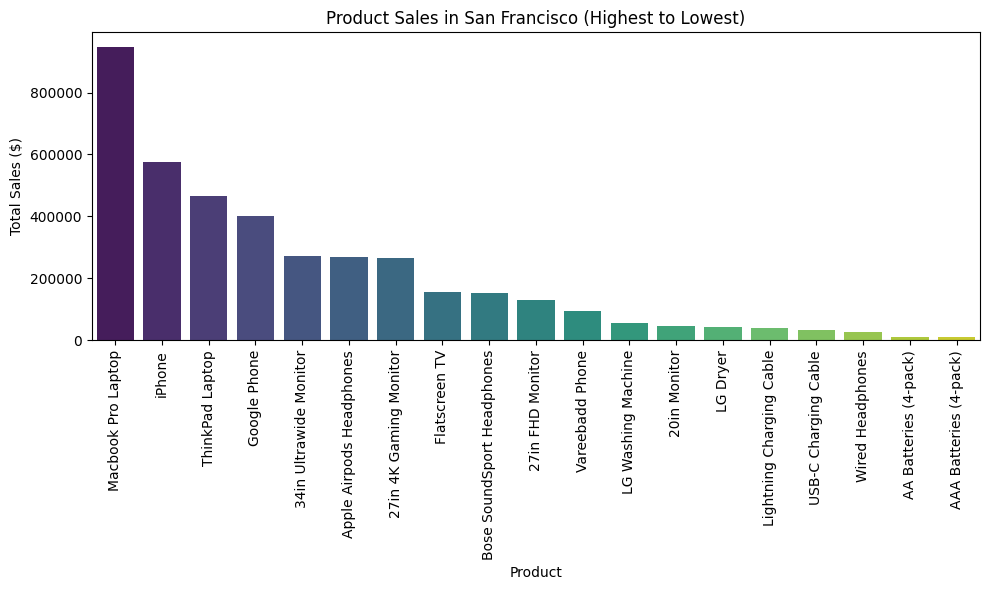

In [70]:
# Filter the data for sales in San Francisco
san_francisco_sales = Final_Sales_2019[Final_Sales_2019['City'] == 'San Francisco']

# Group the data by 'Product' and calculate the total sales for each product
product_sales = san_francisco_sales.groupby('Product')['Total_Sales'].sum().reset_index()

# Sort the data in descending order of total sales
product_sales_sorted = product_sales.sort_values(by='Total_Sales', ascending=False)

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=product_sales_sorted, x='Product', y='Total_Sales', palette='viridis')

# Update chart layout
plt.title('Product Sales in San Francisco (Highest to Lowest)')
plt.xlabel('Product')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability

# Show the plot
plt.tight_layout()  # Adjusts layout to avoid label cut-off
plt.show()

Comments

This shows all the products sold in San Francisco. Macbook Pro Laptop is still most sold product.

Total Sales by Quantity Ordered

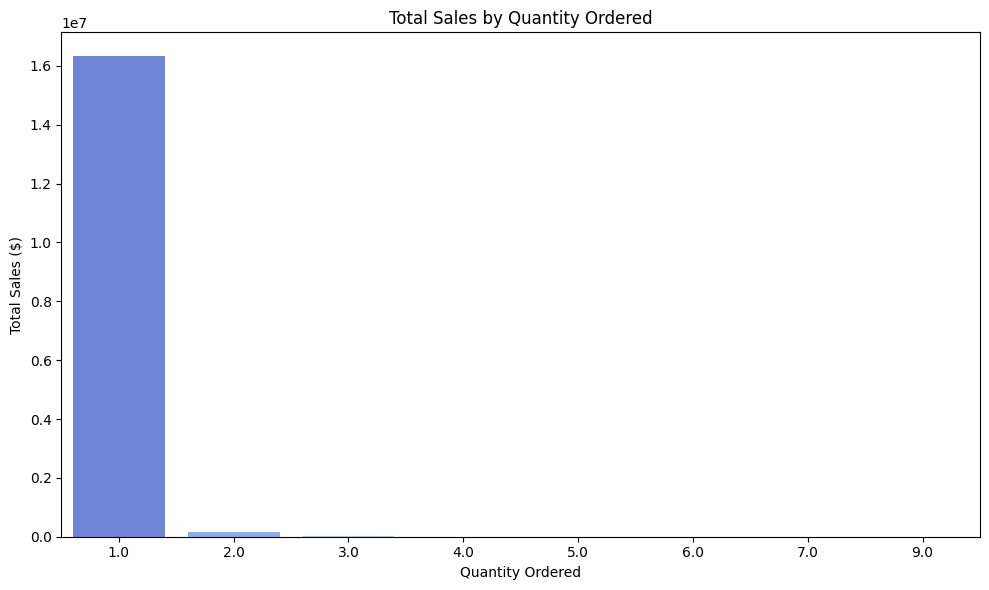

In [71]:
# Group by 'Quantity_Ordered' to calculate Total Sales per Quantity Ordered

quantity_sales = Final_Sales_2019.groupby('Quantity_Ordered')['Total_Sales'].sum().reset_index()

# Create a bar chart

plt.figure(figsize=(10, 6))
sns.barplot(data=quantity_sales, x='Quantity_Ordered', y='Total_Sales', palette='coolwarm')

# Update chart layout

plt.title('Total Sales by Quantity Ordered')
plt.xlabel('Quantity Ordered')
plt.ylabel('Total Sales ($)')

# Show the plot

plt.tight_layout()  # Adjusts layout to avoid label cut-off
plt.show()


Comments

The bar chart visualizes the Total_Sales by Quantity_Ordered, allowing us to compare the sales generated by specific quantitiy. From the chart, we can identify which Quantity 1 the highest and Quantity 9 has lowest sales.

### **Answering Analytical Questions** 

Question 1  Revenue Analysis: How much revenue was generated in 2019 from all transactions?

In [72]:
## Revenue Analysis: How much revenue was generated in 2019 from all transactions?

# Total Sales for 2019
Total_Sales_2019 = Final_Sales_2019['Total_Sales'].sum()
print(f"Total Sales Generated in 2019: ${Total_Sales_2019:.2f}")

Total Sales Generated in 2019: $16513908.56


Question 2 Seasonality Detection: Are there any noticeable seasonal trends in sales (e.g., spikes in specific months or quarters)?

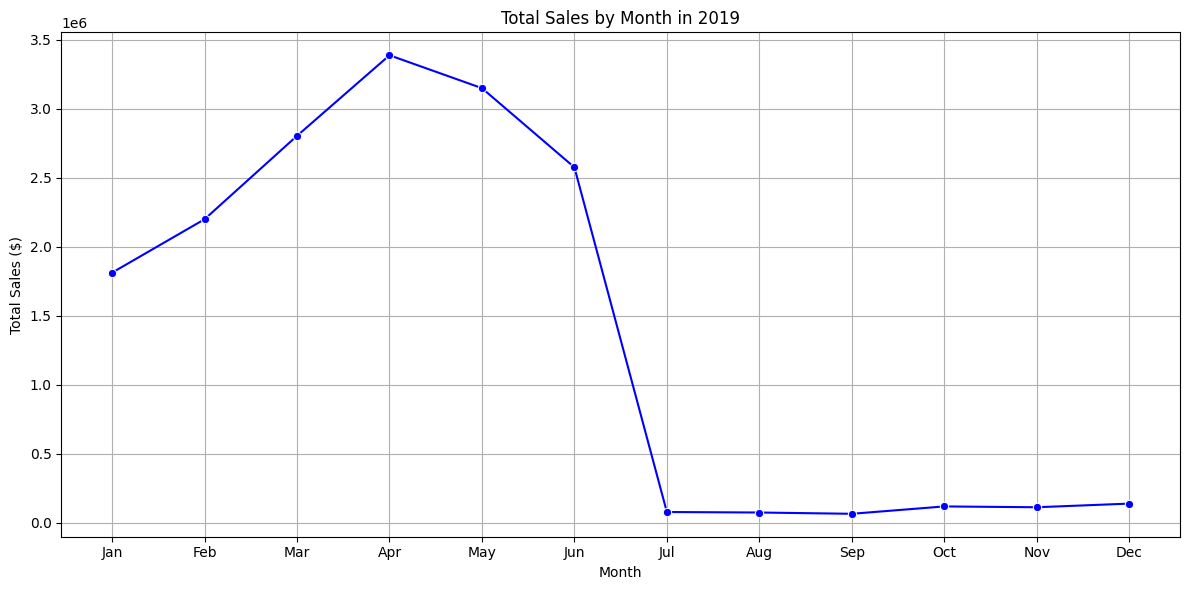

In [73]:
# Ensure that 'Order_Date' is in datetime format
Final_Sales_2019['Order_Date'] = pd.to_datetime(Final_Sales_2019['Order_Date'], errors='coerce')
Final_Sales_2019['Month'] = Final_Sales_2019['Order_Date'].dt.month

# Calculate monthly sales
monthly_sales = Final_Sales_2019.groupby('Month')['Total_Sales'].sum().reset_index()
monthly_sales.columns = ['Month', 'Total_Sales']

# Plot total sales by month using Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='Month', y='Total_Sales', marker='o', color='b')
plt.title('Total Sales by Month in 2019')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.tight_layout()
plt.show()

Insights from the Monthly Sales Trend

Overall Sales Trends: The line chart shows the total sales per month, providing insights into the sales trends over time. From the chart,we can identify any seasonal patterns, trends, or anomalies in the sales data. The sale started increasing from January to April and started declining from May to June. The sales rapidily declined in July to September and slightly increased October to December.

Question 3 Product Performance: What are the best-selling and worst-selling products in terms of revenue and quantity sold?

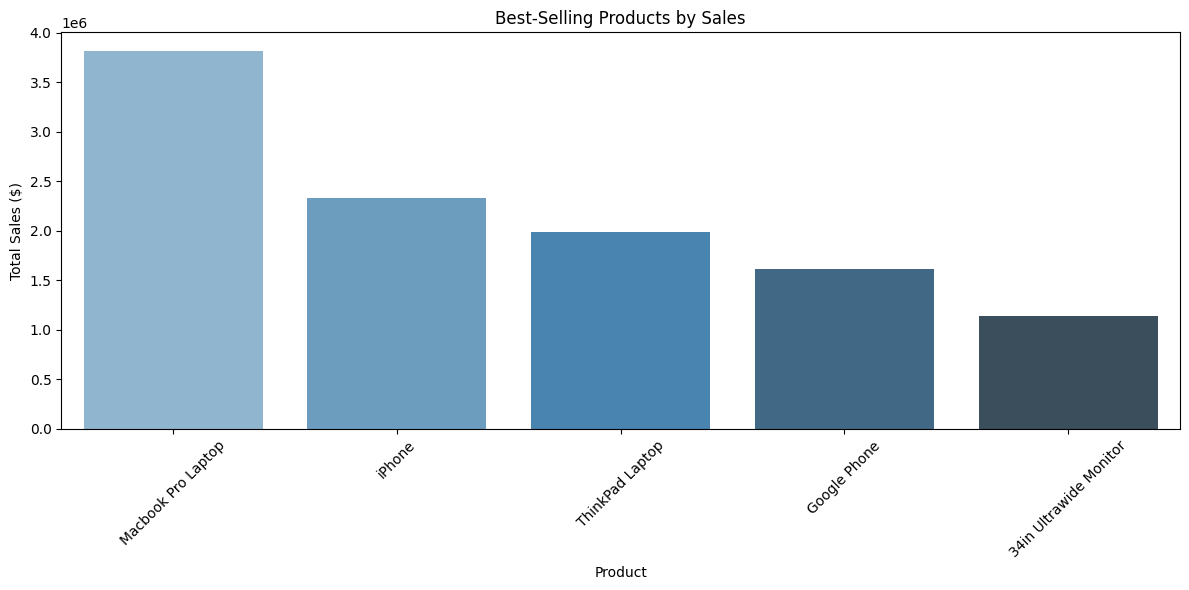

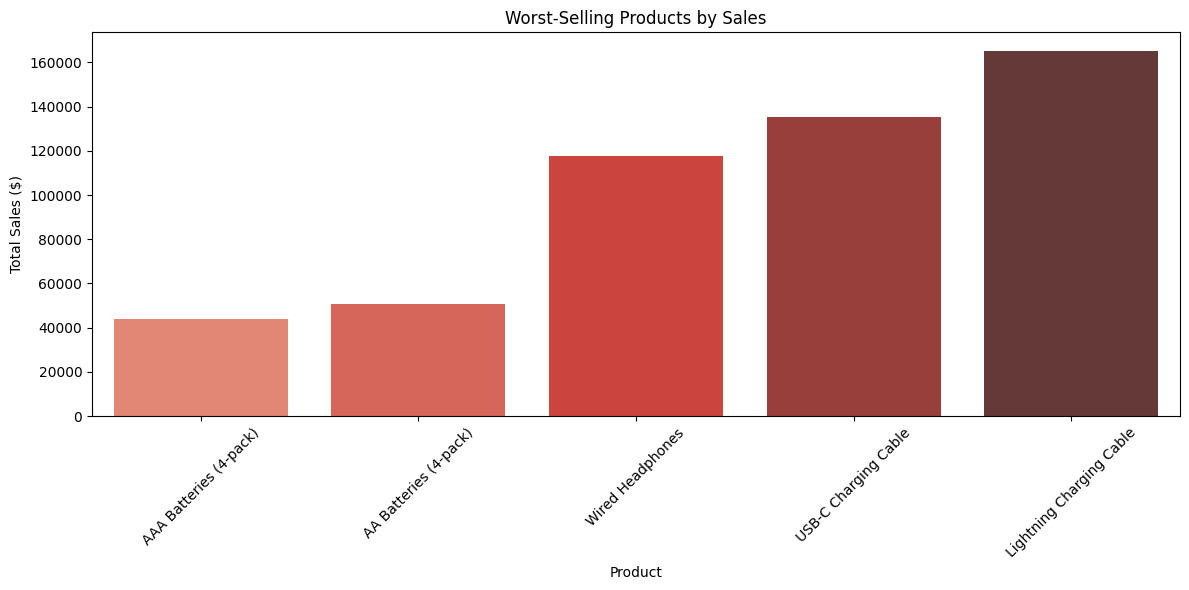

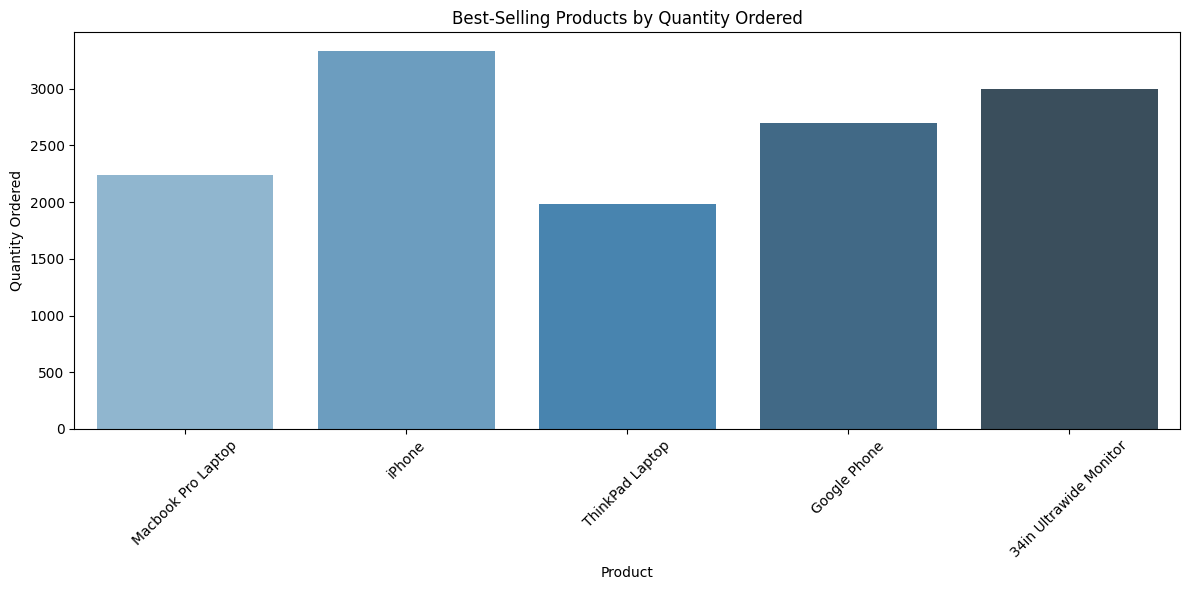

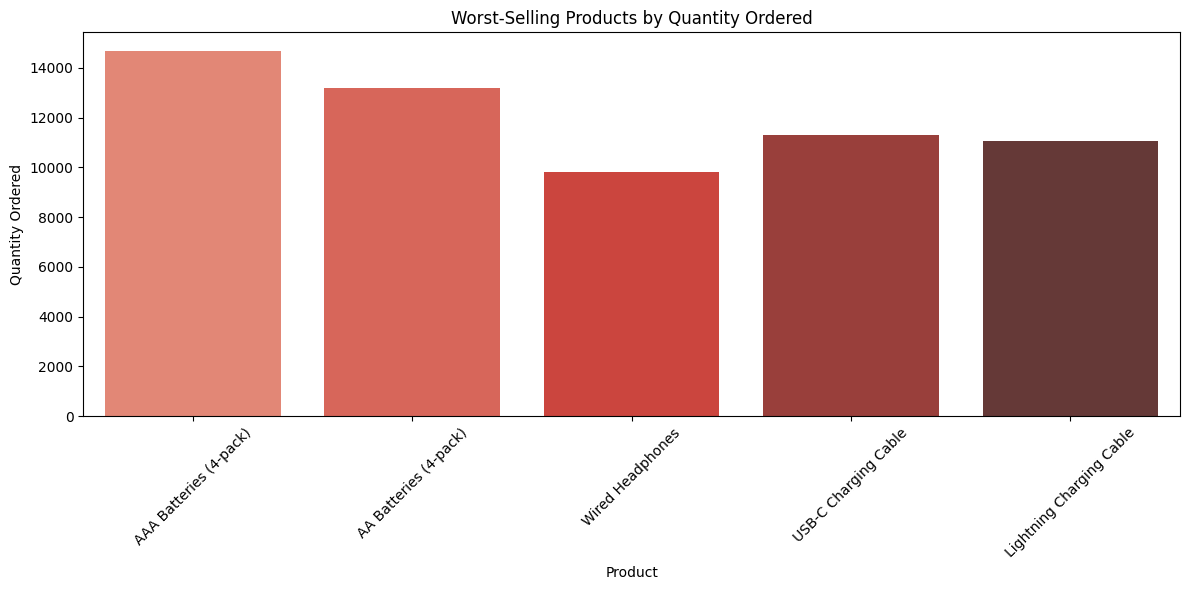

In [74]:
# Group by product and calculate total sales and quantity sold 
product_performance = Final_Sales_2019.groupby('Product')[['Total_Sales', 'Quantity_Ordered']].sum().reset_index()

# Sort products by total revenue and quantity sold
best_selling_products = product_performance.sort_values('Total_Sales', ascending=False).head(5)
worst_selling_products = product_performance.sort_values('Total_Sales', ascending=True).head(5)

# Best-Selling Products by Total Sales
plt.figure(figsize=(12, 6))
sns.barplot(x='Product', y='Total_Sales', data=best_selling_products, palette='Blues_d')
plt.title('Best-Selling Products by Sales')
plt.xlabel('Product')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Worst-Selling Products by Total Sales
plt.figure(figsize=(12, 6))
sns.barplot(x='Product', y='Total_Sales', data=worst_selling_products, palette='Reds_d')
plt.title('Worst-Selling Products by Sales')
plt.xlabel('Product')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Best-Selling Products by Quantity Ordered
plt.figure(figsize=(12, 6))
sns.barplot(x='Product', y='Quantity_Ordered', data=best_selling_products, palette='Blues_d')
plt.title('Best-Selling Products by Quantity Ordered')
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Worst-Selling Products by Quantity Ordered
plt.figure(figsize=(12, 6))
sns.barplot(x='Product', y='Quantity_Ordered', data=worst_selling_products, palette='Reds_d')
plt.title('Worst-Selling Products by Quantity Ordered')
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Comments

The best selling product by sales we have Macbook Pro Laptop leading

The worst selling product by sales ordered we have AAA batteries been the worst.

The best selling product by quantity ordered we have Macbook Pro Laptop leading

The worst selling product by quantity ordered we have Lightning Chargining Cable been the worst but it generates more sales.

Questione 4 Time Comparison: How do sales numbers compare across different time periods (months and weeks) ? Are there any trends, patterns or inconsistencies?

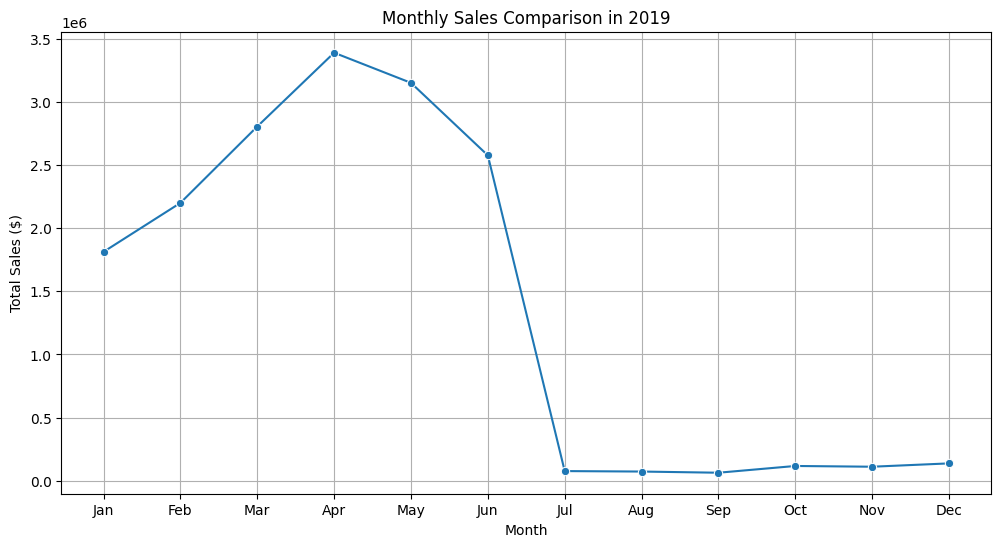

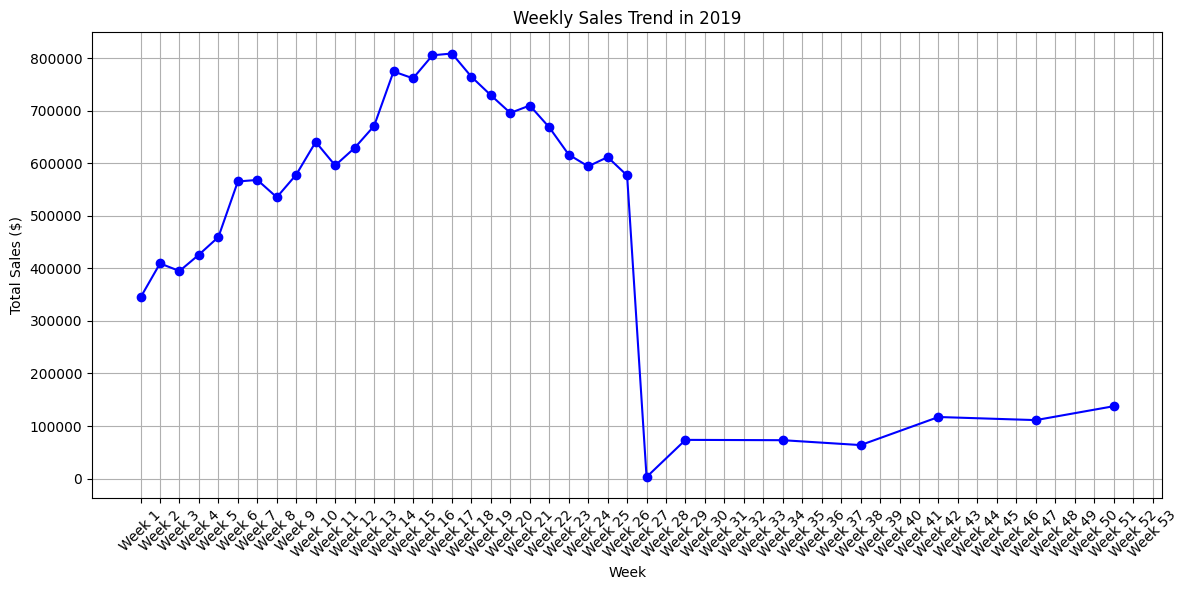

In [75]:
# Plot monthly sales comparison using Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='Month', y='Total_Sales', marker='o', linestyle='-', 
             palette='tab10')
plt.title('Monthly Sales Comparison in 2019')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.xticks(ticks=list(range(1, 13)), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                              'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()


# Ensure that 'Order_Date' is in datetime format
Final_Sales_2019['Order_Date'] = pd.to_datetime(Final_Sales_2019['Order_Date'], errors='coerce')
Final_Sales_2019['Week'] = Final_Sales_2019['Order_Date'].dt.isocalendar().week

# Calculate weekly sales
weekly_sales = Final_Sales_2019.groupby('Week')['Total_Sales'].sum().reset_index()
weekly_sales.columns = ['Week', 'Total_Sales']

# Plot weekly sales trend using Matplotlib
plt.figure(figsize=(12, 6))
plt.plot(weekly_sales['Week'], weekly_sales['Total_Sales'], marker='o', linestyle='-', color='b')
plt.title('Weekly Sales Trend in 2019')
plt.xlabel('Week')
plt.ylabel('Total Sales ($)')
plt.xticks(ticks=range(1, 54), labels=[f'Week {i}' for i in range(1, 54)], rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Overall Sales Trends: The line chart shows the total sales per month, providing insights into the sales trends over time.The sales started increasing from January to April and started declining from May to June. The sales rapidily declined in July to September and slightly increased October to December.

In weekly sales trend, the sales increase from week one and gets to the peak at week 16 and 17. It starts declining at week 18 and dips at week 26. Then it start rising slowly at week 29.

Question 5 Geographic Distribution: Which cities contribute the most to product deliveries and sales?

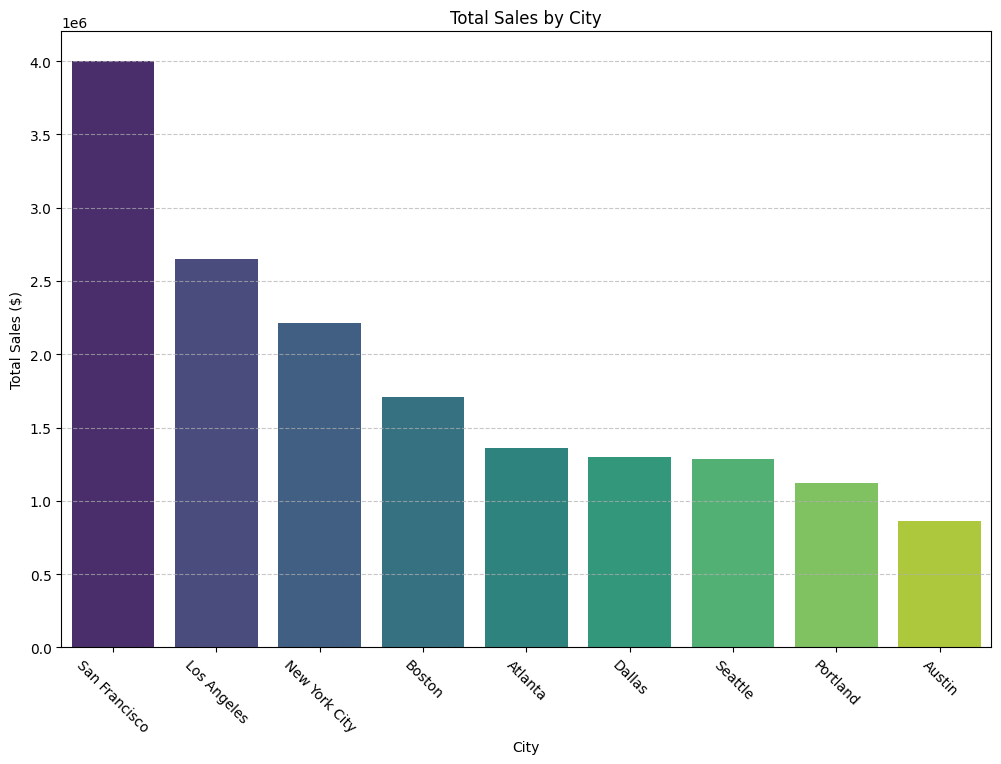

In [76]:
# Group the data by 'City' and calculate the sum of 'Total_Sales' for each city
City = Final_Sales_2019.groupby('City')['Total_Sales'].sum().reset_index()

# Sort the data in descending order of 'Total_Sales'
City = City.sort_values(by='Total_Sales', ascending=False)

# Plot sales by city
plt.figure(figsize=(12, 8))
sns.barplot(data=City, x='City', y='Total_Sales', palette='viridis')
plt.title('Total Sales by City')
plt.xlabel('City')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=-45)  # Rotate the city labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Question 6 Product Level Analysis: How do product level compare in terms of sales generated and quantities sold? Are high-level products driving more sales compared to basic-level products?

Product Level Analysis:
  Product_Level  Total_Sales  Quantity_Ordered
0   Basic-Level   1150552.83           66475.0
1    High-Level  15363355.73           33067.0


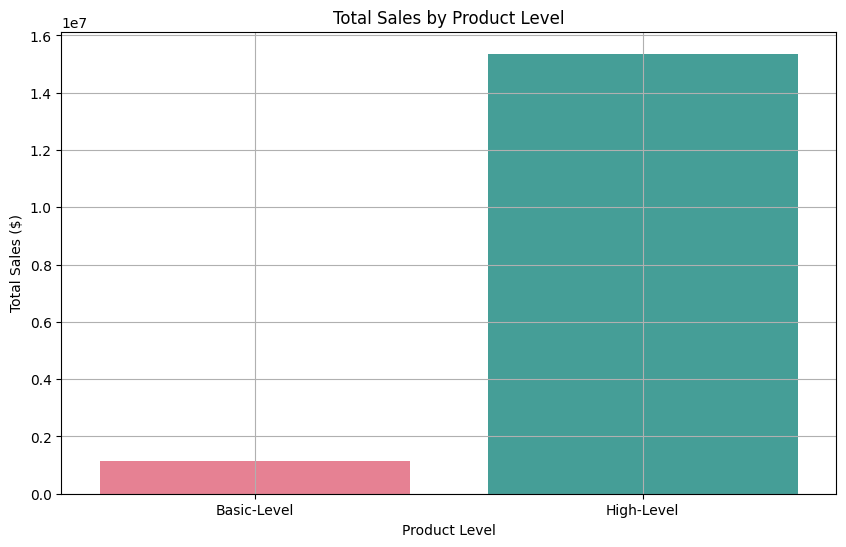

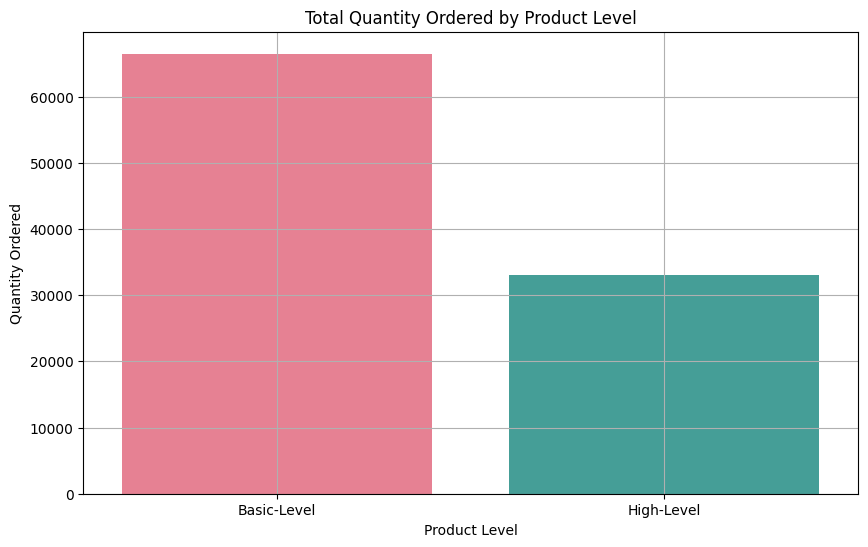

In [77]:
# Group by product level and calculate total sales and quantities sold
Product_Level_Performance = Final_Sales_2019.groupby('Product_Level')[['Total_Sales', 'Quantity_Ordered']].sum().reset_index()

# Print the product category analysis
print("Product Level Analysis:")
print(Product_Level_Performance)

# Plot total sales by product level using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Product_Level', y='Total_Sales', data=Product_Level_Performance, palette='husl')
plt.title('Total Sales by Product Level')
plt.xlabel('Product Level')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=0)  # No rotation for better readability
plt.grid(True)
plt.show()

# Plot quantity ordered by product level using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Product_Level', y='Quantity_Ordered', data=Product_Level_Performance, palette='husl')
plt.title('Total Quantity Ordered by Product Level')
plt.xlabel('Product Level')
plt.ylabel('Quantity Ordered')
plt.xticks(rotation=0)  # No rotation for better readability
plt.grid(True)
plt.show()

Comments.

In terms of quantity ordered by the product level, more orders comes from the basic level products but in terms of high level products generates more sales or money

### **Findings, Insights and Reccommendations**

1. Capitalize on Seasonal Trends
- Insight: Seasonal patterns show spikes in sales during specific months (likely holiday seasons).

- Recommendation: Plan promotional campaigns and marketing efforts around peak sales periods to maximize revenue. Stock up on inventory before high-demand seasons to avoid shortages and meet customer demand effectively. Offer discounts or bundled deals during slower months to encourage more purchases and stabilize sales across the year.

2. Leverage Best-Selling Products
- Insight: Certain products consistently generate the highest revenue and have higher sales volume.

- Recommendation: Focus on promoting best-selling products through targeted advertising, promotions, and upselling. Ensure sufficient inventory of these products to avoid stockouts during peak demand periods. Identify what features or factors make these products successful and consider extending similar strategies to other product lines.

3. Improve or Phase Out Underperforming Products
- Insight: Worst-selling products generate low revenue and sell in low quantities.

- Recommendation: Analyze the reasons for poor sales (e.g., high prices, low demand, poor marketing) and try adjusting product positioning, pricing, or promotional efforts. If there’s no improvement after analysis, consider discontinuing the least popular products to optimize resources and make room for better-selling items. Offer clearance sales or bundle slow-moving products with popular items to move inventory faster.

4. Target Cities with High Sales Potential
- Insight: Sales vary significantly across cities, with some contributing disproportionately higher revenue.

- Recommendation: Focus marketing efforts and regional promotions on top-performing cities to further boost sales in those locations. Explore why certain cities are underperforming and, if possible, create tailored strategies (e.g., localized marketing or region-specific promotions) to stimulate sales. Allocate more resources (inventory, logistics, etc.) to high-sales regions to improve delivery times and customer satisfaction.

5. Maximize Revenue from Repeat Customers
- Insight: Recurring customers often contribute a substantial portion of sales, and retaining them is more cost-effective than acquiring new ones.

- Recommendation: Implement a loyalty or rewards program to encourage repeat purchases and increase customer lifetime value. Use personalized marketing strategies to engage customers based on their past purchasing behavior, offering tailored product recommendations and discounts. Invest in improving customer satisfaction and reducing churn by ensuring a seamless customer experience, including faster delivery, excellent customer service, and hassle-free returns.

6. Refine Inventory and Supply Chain Management
- Insight: Some months or weeks show irregular sales fluctuations due to unforeseen factors.

- Recommendation: Use demand forecasting models to ensure optimal inventory levels, particularly for best-selling products during high-demand periods. Improve supply chain agility to respond faster to sales trends and market shifts, especially in top-performing cities. Regularly monitor residuals from sales trends to catch any irregularities early and take corrective action (e.g., logistical bottlenecks or unplanned market changes).

## **Deployment**

We deploy on a Power Bi Dasboard for data interactivity

In [78]:
csv_filename='Final_Sales_2019.csv'
Final_Sales_2019.to_csv(csv_filename,index= False)